# Classification : Decision Tree


## 00 환경준비

### 1) Import

In [ ]:
#라이브러리들을 불러오자.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

### 2) data loading

In [ ]:
path = 'https://raw.githubusercontent.com/DA4BAM/dataset/master/credit_all.csv'
data = pd.read_csv(path)
data.drop(['Purpose','MostValuableAsset','CreditCount','Occupation','Telephone'], axis = 1, inplace = True)
data.head()

,Creditability,AccountBalance,Duration,Payment,CreditAmount,Employment,SexMarital,CurrentAddress,Age,Apartment,Dependents,ForeignWorker
0,1,3,24,2,1249,2,4,2,28,2,1,1
1,1,2,9,2,276,3,4,4,22,1,1,1
2,1,1,18,4,1049,2,2,4,21,1,1,1
3,1,1,24,4,6419,5,2,4,44,3,2,1
4,1,3,12,2,1424,5,2,4,55,2,1,1


|	칼럼명	|	설명	|		|	값 설명	|
|	----	|	----	|	----	|	----	|
|	**Creditability**	|	Creditability	|	신용도	|	0 : 낮은 신용도, 1 : 높은 신용도, **Target**	|
|	AccountBalance	|	Account Balance	|	은행잔고	|	1: No account, 2 : None (No balance), 3 : Some Balance	|
|	CreditDuration	|	Duration of Credit (month)	|	 신청한 대출기간(월)	|	숫자	|
|	Payment	|	Payment Status of Previous Credit	|	과거 대출 납입 상태	|	0 : Delayed, 1 : Other Credits, 2 : Paid Up, 3 : No Problem with Current Credits, 4 : Previous Credits Paid	|
|	CreditAmount	|	Credit Amount($)	|	신청한 대출금액	|	숫자	|
|	Employment	|	Length of current employment(Month)	|	현 직업 근무 기간	|	1: Unemployed, 2: <1 Year, 3: [1, 4), 4: [4, 7), 5: Above 7	|
|	SexMarital	|	Sex & Marital Status	|	성별 & 결혼상태	|	1: Male, Divorced, 2: Male, Single, 3: Male, Married/Widowed, 4: Female	|
|	CurrentAddress	|	Duration in Current address	|	현 거주지 거주기간	|	1: <1 Year , 2: [1, 4), 3: [4, 7), 4: Above 7	|
|	Age	|	Age (years)	|	나이	|	숫자	|
|	Appartment	|	Type of apartment	|	주거환경	|	1: free apartment, 2: Rented, 3: Owned	|
|	Occupation	|	Occupation	|	직업	|	1: Unemployed, unskilled, 2: Unskilled Permanent Resident, 3: Skilled, 4: Executive	|
|	Telephone	|	Telephone	|	전화기 소유 여부	|	1: No, 2: Yes 	|
|	ForeignWorker	|	Foreign Worker	|	외국인 근로자 여부	|	1: No, 2: Yes	|

## 10.데이터 이해

### 1)둘러보기

In [ ]:
# 상/하위 몇개 행을 살펴 봅시다.
data.head()

,Creditability,AccountBalance,Duration,Payment,CreditAmount,Employment,SexMarital,CurrentAddress,Age,Apartment,Dependents,ForeignWorker
0,1,3,24,2,1249,2,4,2,28,2,1,1
1,1,2,9,2,276,3,4,4,22,1,1,1
2,1,1,18,4,1049,2,2,4,21,1,1,1
3,1,1,24,4,6419,5,2,4,44,3,2,1
4,1,3,12,2,1424,5,2,4,55,2,1,1


In [ ]:
# 각 칼럼의 타입을 살펴 봅시다.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Creditability   1000 non-null   int64
 1   AccountBalance  1000 non-null   int64
 2   Duration        1000 non-null   int64
 3   Payment         1000 non-null   int64
 4   CreditAmount    1000 non-null   int64
 5   Employment      1000 non-null   int64
 6   SexMarital      1000 non-null   int64
 7   CurrentAddress  1000 non-null   int64
 8   Age             1000 non-null   int64
 9   Apartment       1000 non-null   int64
 10  Dependents      1000 non-null   int64
 11  ForeignWorker   1000 non-null   int64
dtypes: int64(12)
memory usage: 93.9 KB


### 2) EDA & CDA
여기에서는 다루지 않습니다.

## 20.데이터 준비

### 1) 데이터분할 : x, y 나누기

In [ ]:
target = 'Creditability'
x = data.drop(target, axis = 1)
y = data.loc[:, target]

### 2) 변수정리
불필요한 변수가 있으면 제거합니다.

### 3) NA 조치

In [ ]:
x.isna().sum()

AccountBalance    0
Duration          0
Payment           0
CreditAmount      0
Employment        0
SexMarital        0
CurrentAddress    0
Age               0
Apartment         0
Dependents        0
ForeignWorker     0
dtype: int64

### 4) 가변수화

가변수화를 수행하시오.

In [ ]:
cat_cols = ['AccountBalance','Payment','Employment','SexMarital','CurrentAddress','Apartment','Dependents','ForeignWorker']
x = pd.get_dummies(x, columns = cat_cols, drop_first = True)
x.head()

,Duration,CreditAmount,Age,AccountBalance_2,AccountBalance_3,Payment_1,Payment_2,Payment_3,Payment_4,Employment_2,...,SexMarital_2,SexMarital_3,SexMarital_4,CurrentAddress_2,CurrentAddress_3,CurrentAddress_4,Apartment_2,Apartment_3,Dependents_2,ForeignWorker_2
0,24,1249,28,0,1,0,1,0,0,1,...,0,0,1,1,0,0,1,0,0,0
1,9,276,22,1,0,0,1,0,0,0,...,0,0,1,0,0,1,0,0,0,0
2,18,1049,21,0,0,0,0,0,1,1,...,1,0,0,0,0,1,0,0,0,0
3,24,6419,44,0,0,0,0,0,1,0,...,1,0,0,0,0,1,0,1,1,0
4,12,1424,55,0,1,0,1,0,0,0,...,1,0,0,0,0,1,1,0,0,0


### 5) 데이터분할 : train : validation

In [ ]:
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size = .3)

### 6) Scaling

## 30.모델링

#### 1) 필요한 함수 불러오기

In [ ]:
# 모델링을 위해
from sklearn.tree import DecisionTreeClassifier

# 평가를 위해.
from sklearn.metrics import *

#### 2) 선언(모델링을 어떻게 할 것인지 설정, 선언)

In [ ]:
model = DecisionTreeClassifier()

Decision Tree를 기본값으로 만들면, 가장 복잡한 모델을 생성한다.

#### 3) 모델링(학습)

In [ ]:
model.fit(x_train, y_train)

DecisionTreeClassifier()

#### 4) 검증 : 예측

In [ ]:
pred = model.predict(x_val)

#### 5) 검증 : 평가

In [ ]:
confusion_matrix(y_val, pred)

array([[ 42,  48],
       [ 57, 153]])

In [ ]:
print(classification_report(y_val, pred))

              precision    recall  f1-score   support

           0       0.42      0.47      0.44        90
           1       0.76      0.73      0.74       210

    accuracy                           0.65       300
   macro avg       0.59      0.60      0.59       300
weighted avg       0.66      0.65      0.65       300



## 40.Decision Tree 추가 내용

### 1) 모델 시각화

In [ ]:
data.head()

,Creditability,AccountBalance,Duration,Payment,CreditAmount,Employment,SexMarital,CurrentAddress,Age,Apartment,Dependents,ForeignWorker
0,1,3,24,2,1249,2,4,2,28,2,1,1
1,1,2,9,2,276,3,4,4,22,1,1,1
2,1,1,18,4,1049,2,2,4,21,1,1,1
3,1,1,24,4,6419,5,2,4,44,3,2,1
4,1,3,12,2,1424,5,2,4,55,2,1,1


In [ ]:
y.unique()

array([1, 0])

In [ ]:
x_train.shape

(700, 23)

In [ ]:
x.shape

(1000, 23)

https://scikit-learn.org/stable/modules/generated/sklearn.tree.plot_tree.html

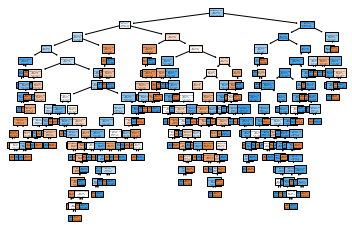

In [ ]:
# 시각화
from sklearn import tree
# from sklearn.tree import plot_tree

# Decision Tree는 모델을 시각화 할 수 있습니다.
tree.plot_tree(model,                       #만든 모델 이름
               feature_names = x_train.columns,    #Feature 이름
               class_names= ['Low', 'High'],         #Target(Class) 이름 
               filled = True);

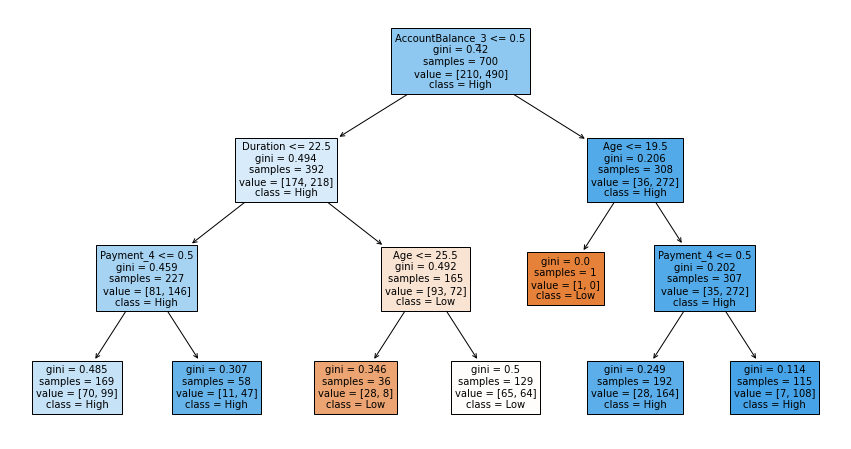

In [ ]:
model2 = DecisionTreeClassifier(max_depth = 3)
model2.fit(x_train, y_train)

plt.figure(figsize = (15,8)) # 그림 사이즈 조절
tree.plot_tree(model2, feature_names = x_train.columns, 
               class_names= ['Low', 'High'], filled = True, fontsize = 10);

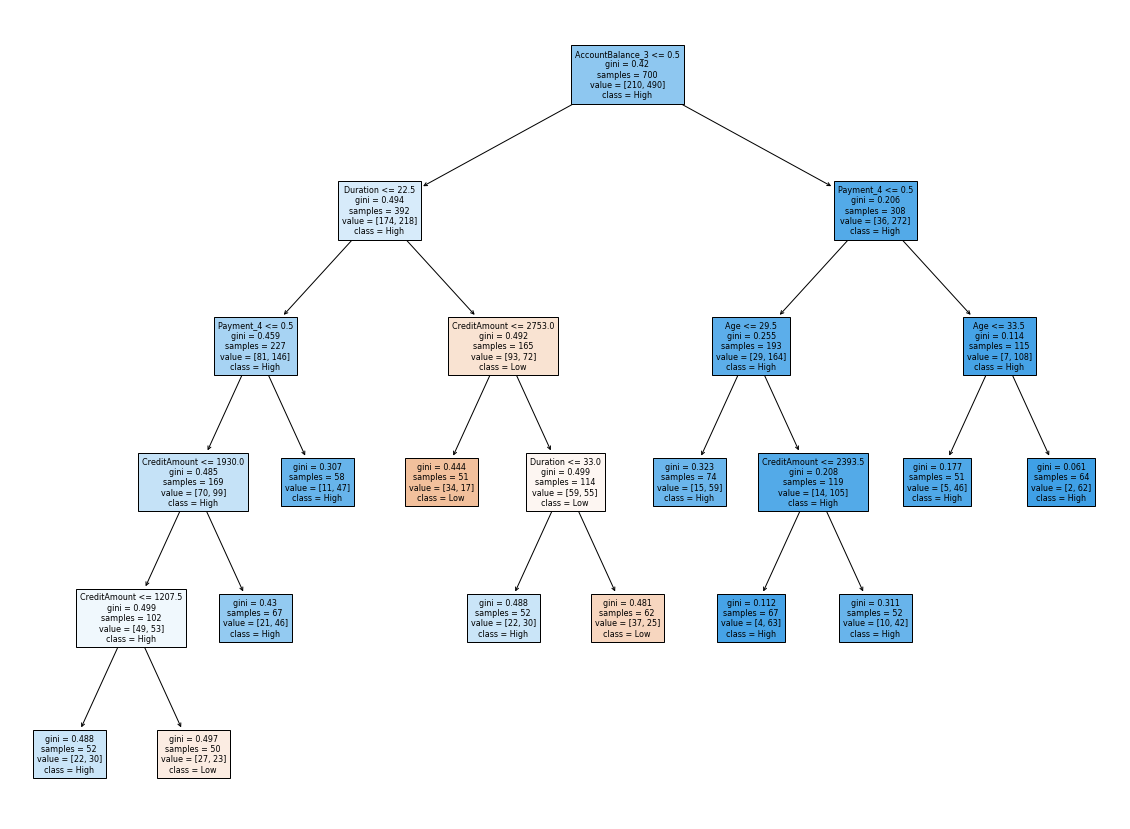

In [ ]:
model3 = DecisionTreeClassifier(min_samples_leaf= 50)
model3.fit(x_train, y_train)

plt.figure(figsize = (20,15)) # 그림 사이즈 조절
tree.plot_tree(model3, feature_names = x_train.columns, 
               class_names= ['Low', 'High'], filled = True, fontsize = 8);

### 2) 변수 중요도

In [ ]:
# 변수 중요도
print(x_train.columns)
print(model.feature_importances_)

Index(['Duration', 'CreditAmount', 'Age', 'AccountBalance_2',
       'AccountBalance_3', 'Payment_1', 'Payment_2', 'Payment_3', 'Payment_4',
       'Employment_2', 'Employment_3', 'Employment_4', 'Employment_5',
       'SexMarital_2', 'SexMarital_3', 'SexMarital_4', 'CurrentAddress_2',
       'CurrentAddress_3', 'CurrentAddress_4', 'Apartment_2', 'Apartment_3',
       'Dependents_2', 'ForeignWorker_2'],
      dtype='object')
[0.10960531 0.21242036 0.20200601 0.01462585 0.12545909 0.02428461
 0.01175359 0.0035767  0.02582989 0.02509256 0.02244759 0.02818425
 0.01336668 0.02122554 0.02504361 0.0201826  0.03575577 0.01302605
 0.02301776 0.01610232 0.00878786 0.018206   0.        ]


* 변수중요도 그래프 그리기 함수 만들기

In [ ]:
import seaborn as sns

In [ ]:
def plot_feature_importance(importance, names):
    feature_importance = np.array(importance)
    feature_names = np.array(names)

    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)

    fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)
    fi_df.reset_index(drop=True, inplace = True)

    plt.figure(figsize=(10,8))
    sns.barplot(x='feature_importance', y='feature_names', data = fi_df)

    plt.xlabel('Feature Importance')
    plt.ylabel('Feature Name')
    plt.grid()

    return fi_df

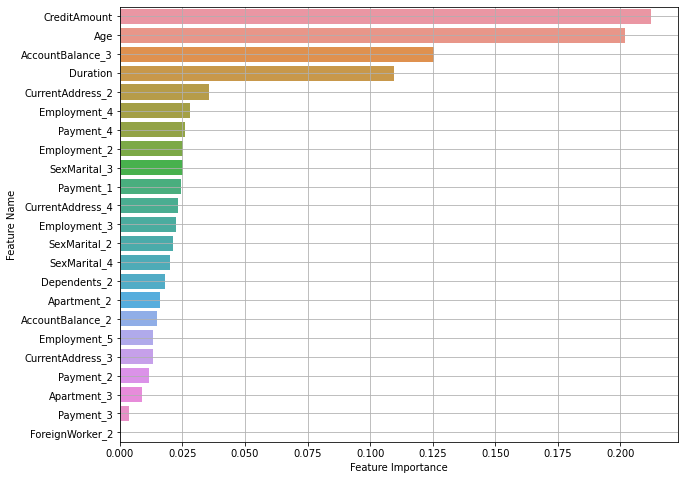

In [ ]:
result = plot_feature_importance(model.feature_importances_, list(x_train))

## 50.Multi Class

y의 범주 갯수가 3개 이상

### 1) 데이터 준비

In [ ]:
data = pd.read_csv('https://raw.githubusercontent.com/DA4BAM/dataset/master/iris.csv')
data.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
target = 'Species'
x = data.drop(target, axis=1)
y = data.loc[:, target]

x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=.3
                                                  , random_state = 2022)

In [ ]:
y.value_counts()

setosa        50
versicolor    50
virginica     50
Name: Species, dtype: int64

### 2) 모델링

In [ ]:
model = DecisionTreeClassifier(max_depth = 3)
model.fit(x_train, y_train)
pred = model.predict(x_val)

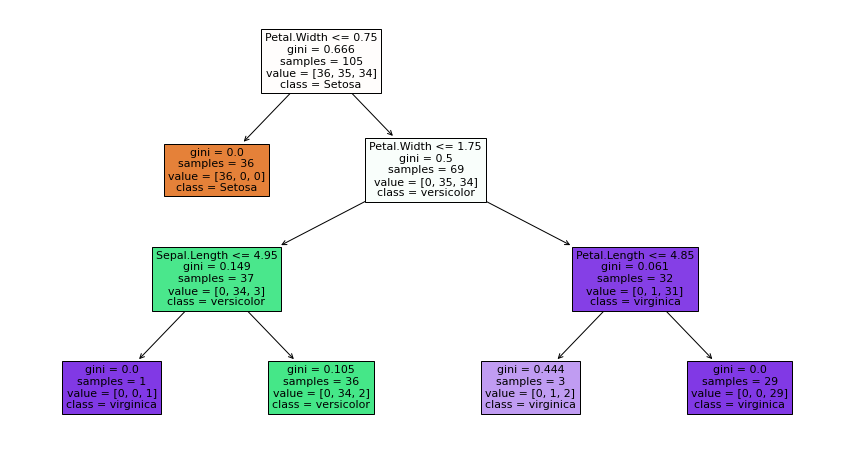

In [ ]:
plt.figure(figsize = (15,8)) # 그림 사이즈 조절
tree.plot_tree(model, feature_names = x_train.columns, 
               class_names= ['Setosa', 'versicolor','virginica'], filled = True, fontsize = 11);

In [ ]:
confusion_matrix(y_val, pred)

array([[14,  0,  0],
       [ 0, 14,  1],
       [ 0,  2, 14]])

In [ ]:
print(classification_report(y_val, pred))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        14
  versicolor       0.88      0.93      0.90        15
   virginica       0.93      0.88      0.90        16

    accuracy                           0.93        45
   macro avg       0.94      0.94      0.94        45
weighted avg       0.93      0.93      0.93        45

